In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel("C:\\Users\\fl9768\\Desktop\\retracting_train.xlsx")

In [3]:
data.head()

,Mast name,Load case,retracting force,section modulus (in^3),Overhang (in),Stress value (psi)
0,DR410i SP,Retracting,58905.00,3.901175,367.375,19920.0
1,DR410i SP,0.75 retracting,44178.75,3.901175,367.375,19870.0
2,DR410i SP,0.8 retracting,47124.00,3.901175,367.375,19978.0
3,DR410i SP,1.1 retracting,64795.50,3.901175,367.375,20235.0
4,DR410i SP,1.2 retracting,70686.00,3.901175,367.375,21272.0


In [4]:
data = data.drop('Load case', axis = 'columns')
data = data.drop('Mast name', axis = 'columns')
data.head()

,retracting force,section modulus (in^3),Overhang (in),Stress value (psi)
0,58905.00,3.901175,367.375,19920.0
1,44178.75,3.901175,367.375,19870.0
2,47124.00,3.901175,367.375,19978.0
3,64795.50,3.901175,367.375,20235.0
4,70686.00,3.901175,367.375,21272.0


In [5]:
import smogn

In [6]:
rg_mtrx = [

    [8000, 1, 0],  ## over-sample ("minority")
    [8500, 1, 0],
    [9000, 1, 0],
    [9500, 1, 0],
#     [10000, 1, 0],
#     [10500, 1, 0],
#     [11000, 1, 0],
#     [11500, 1, 0],
#     [12000, 1, 0],
#     [12500, 1, 0],
#     [13000, 1, 0],
#     [13500, 1, 0],
#     [14000, 1, 0],
#     [14500, 1, 0],
#     [15000, 1, 0],
#     [15500, 1, 0],
#     [16000, 1, 0],
#     [16500, 1, 0],
#     [17000, 1, 0],
#     [17500, 1, 0],
#     [18000, 1, 0],
#     [18500, 1, 0],
#     [19000, 1, 0],
#     [19500, 1, 0],
#     [20000, 1, 0],
#     [20500, 1, 0],
#     [21000, 1, 0],
#     [11000, 1, 0],
#     [12500, 1, 0],
#     [18000, 1, 0],
#     [19000, 1, 0],
#     [20000, 1, 0],
    [28000, 0, 0]
]

In [7]:
data_smogn = smogn.smoter(data = data, y = "Stress value (psi)", rel_method = 'manual', rel_ctrl_pts_rg = rg_mtrx, samp_method = 'extreme')

r_index: 100%|#########################################################################| 2/2 [00:00<00:00, 1004.98it/s]


In [8]:
data_smogn

,retracting force,section modulus (in^3),Overhang (in),Stress value (psi)
0,58905.000000,3.901175,367.375000,19920.000000
1,44178.750000,3.901175,367.375000,19870.000000
5,85883.000000,4.657866,178.205000,9721.450000
6,64412.250000,4.657866,178.205000,7350.700000
7,68706.400000,4.657866,178.205000,8156.400000
8,77294.700000,4.657866,178.205000,9121.800000
9,103059.600000,4.657866,178.205000,12018.500000
10,49480.500000,3.901175,209.375000,8356.700000
11,59376.600000,3.901175,209.375000,8587.350000
12,72571.400000,3.901175,209.375000,8840.000000


In [9]:
data.shape

(30, 4)

In [10]:
data_smogn.shape

(33, 4)

In [11]:
frames = [data, data_smogn]
df = pd.concat(frames)
df

,retracting force,section modulus (in^3),Overhang (in),Stress value (psi)
0,58905.000000,3.901175,367.375000,19920.000000
1,44178.750000,3.901175,367.375000,19870.000000
2,47124.000000,3.901175,367.375000,19978.000000
3,64795.500000,3.901175,367.375000,20235.000000
4,70686.000000,3.901175,367.375000,21272.000000
...,...,...,...,...
6,77076.655939,4.658517,177.978839,9118.589475
7,85949.920530,4.651289,178.013362,9735.943795
8,102500.895533,4.657059,178.433394,12038.938375
9,56459.837772,3.901175,209.375000,8470.455144


In [12]:
df.shape

(63, 4)

In [13]:
X_train = df[['retracting force', 'section modulus (in^3)', 'Overhang (in)']]
y_train = df[["Stress value (psi)"]]

In [14]:
import xgboost as xgb
# from sklearn.model_selection import GridSearchCV
# param_grid = {"max_depth":    [2, 3, 4, 5, 6],
#               "n_estimators": [175, 200, 300, 400, 500, 600, 700, 800, 900, 1000], "learning_rate": [0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05]}
# xgb_model = xgb.XGBRegressor(eval_metric = 'rmsle')
# search = GridSearchCV(xgb_model, param_grid, cv=5).fit(X_train, y_train.values.ravel())
# print("The best hyperparameters are ",search.best_params_)

In [15]:
xgb_model = xgb.XGBRegressor(max_depth = 3, n_estimators = 750, learning_rate = 0.02)

In [16]:
xgb_model.fit(X_train, y_train.values.ravel())

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.02, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=750, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [17]:
test_data = pd.read_excel("C:\\Users\\fl9768\\Desktop\\retracting_test.xlsx")
X_test = test_data[['retracting force', 'section modulus (in^3)', 'Overhang (in)']]
y_test = test_data[['Stress value (psi)']]

In [18]:
y_pred_xgb = xgb_model.predict(X_test)

In [19]:
y_pred_xgb

array([19977.965, 11714.85 ,  8583.539,  8432.208, 19350.395, 20760.463],
      dtype=float32)

In [20]:
from sklearn.metrics import mean_squared_error
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, y_pred_xgb))))

RMSE: 320.26341724926715


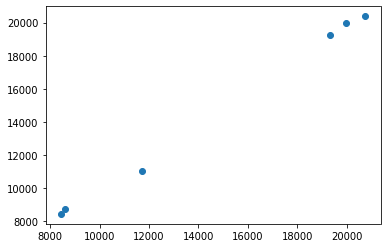

In [21]:
import matplotlib.pyplot as plt
plt.scatter(y_pred_xgb, y_test)

In [22]:
y_test['Predicted value RF'] = y_pred_xgb
y_test['Difference'] = abs(y_test['Stress value (psi)'] - y_test['Predicted value RF'])
y_test

C:\Users\fl9768\AppData\Local\Temp\ipykernel_4116\1058324115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['Predicted value RF'] = y_pred_xgb
C:\Users\fl9768\AppData\Local\Temp\ipykernel_4116\1058324115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['Difference'] = abs(y_test['Stress value (psi)'] - y_test['Predicted value RF'])


,Stress value (psi),Predicted value RF,Difference
0,19996.00,19977.964844,18.035156
1,11053.00,11714.849609,661.849609
2,8715.85,8583.539062,132.310938
3,8449.20,8432.208008,16.991992
4,19230.00,19350.394531,120.394531
5,20380.00,20760.462891,380.462891


In [25]:
import pickle
pickle.dump(xgb_model, open('retracting_xgb.pkl', 'wb'))

In [26]:
retracting_prediction = pickle.load(open('retracting_xgb.pkl', 'rb'))
retracting_prediction.predict(X_test)

array([19977.965, 11714.85 ,  8583.539,  8432.208, 19350.395, 20760.463],
      dtype=float32)